In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Chlamy and light: 
### Computational model of the spectral dependency of the short-term acclimation response in micro algae *Chlamynomonas reinhardtii*

Analysis of the experiments performed in 2015 by Dr. Serena Flores and Assistant Professor Ryutaro Tokutsu

#### Protocol
Experiment has been performed using three strains of micro alga Chlamydomonas:
- 137c
- stt7-9
- npq4

Samples has ben exposed to:
- 2 different light intensities: 10 and 100 $\mu$mol photons per $m^2$
- 12 different wavelengths: 360, 400, 445, 460, 480, 510, 550, 630, 650, 670, 690, 720 nm

and the measurements has been taken after:
- 15 minutes
- 4 hours of light exposure.

In [2]:
wv = [360, 400, 445, 460, 480, 510, 550, 630, 650, 670, 690, 720]

Experimental data has been shared in excell sheet format. Below, first 10 rows of the experimental data collected for WT sampe is displayed.

In [8]:
folder = './data/201610_Serena/'

In [12]:
#excel_file = '/home/anna/ownCloud/OLS/201610_Serena/160930 137c OLS 77K dataset.xlsx'
excel_file = str(folder + '161004 137c OLS 77K dataset.xlsx')
sheets = {'15min':'blue', '4h':'red'}
wt = {}
for j in sheets.keys():
    wt[j]= pd.read_excel(excel_file, sheet_name=j)
wt['15min'][:10]

C13 15min  wavelength     Dark 01     Dark 02    360nm 01    360nm 02  \
0        NaN         600  1310.48466  1318.68084  1664.66674  1632.64982   
1        NaN         601  1273.26006  1763.52365  1434.99693  1613.03336   
2        NaN         602  1384.22793  1273.59814  1617.86249  1833.99276   
3        NaN         603  1384.83625  1847.47871  1406.76360  1733.65269   
4        NaN         604  1357.40862  1958.48382  1378.64979  1189.60026   
5        NaN         605  1003.30439  1200.18402  1663.87601  1264.33842   
6        NaN         606  1458.48778  1338.59544  1360.95979  1576.01871   
7        NaN         607  1178.75245  1245.36815  1415.77836  1722.58628   
8        NaN         608  1197.29810  1143.23242  1398.75005  1465.20914   
9        NaN         609  1234.66769  1403.50469  1391.02442  1631.78161   

     400nm 01    400nm 02    445nm 01    445nm 02  ...    650nm 01  \
0   923.34205   869.41257  1099.74910  3598.90834  ...   847.28851   
1  1061.75817  1118.25858  1273.87544  3068.25446  ...  1083.05174   
2  1135.09419   999.83720  1191.59430  3430.78113  ...   938.16964   
3   996.85805   925.87144  1291.05236  3084.55988  ...  1001.25036   
4  1199.30204  1071.09905  1135.94807  2993.81946  ...   974.31705   
5  1023.84243   879.99239   980.27011  3192.79953  ...   911.07640   
6   722.73578   980.40780  1089.74134  2966.08456  ...   928.60413   
7  1098.01918  1263.86190  1189.94430  2984.60711  ...  1038.00710   
8   831.13146   890.29326  1016.43818  2731.23840  ...   819.67004   
9  1005.44803   826.07478  1254.11078  3013.78116  ...  1010.61383   

     650nm 02    670nm 01    670nm 02    690nm 01    690nm 02    720nm 01  \
0  1263.71548  2507.71184  1434.92281  1724.06826  1322.13169  2461.46609   
1  1082.64071  2733.94736  1543.99865  1957.50647  1530.94644  1952.30823   
2  1236.73698  2126.70639  1226.08501  1523.17906  1439.81955  2706.28010   
3  1354.41230  2534.70085  1598.37754  1923.05593  1329.75927  1943.94903   
4  1336.23478  2054.12099  1235.71791  2122.65297  1421.51247  2269.25985   
5  1118.92700  2288.56446  1371.02930  2116.37130  1484.47886  2152.38557   
6  1055.05418  2306.86446  1344.41619  1897.76788  1402.69186  1833.96611   
7  1109.42905  2480.18264  1017.84792  2189.35202  1349.24694  1943.67136   
8  1173.23114  1963.42579  1007.97602  2025.56691   957.51205  2064.50191   
9  1209.17649  1962.38765  1171.99410  1971.12062  1239.78939  1690.07851   

     720nm 02  WhiteHL 01  WhiteHL 02  
0  5909.39232  1961.87125  1680.24420  
1  5952.73015  1678.91189  1580.41912  
2  6310.59432  2435.72043  1854.59483  
3  5406.70288  1842.89270  1635.73036  
4  5913.14346  1578.63672  1717.69488  
5  5554.01129  1660.75874  1544.12675  
6  5299.97630  2042.29827  1808.59668  
7  5370.62344  1742.80127  1708.25923  
8  5207.78796  1606.13421  1544.45326  
9  5117.00812  1596.26037  1553.28656  

[10 rows x 30 columns]

<IPython.core.display.Javascript object>


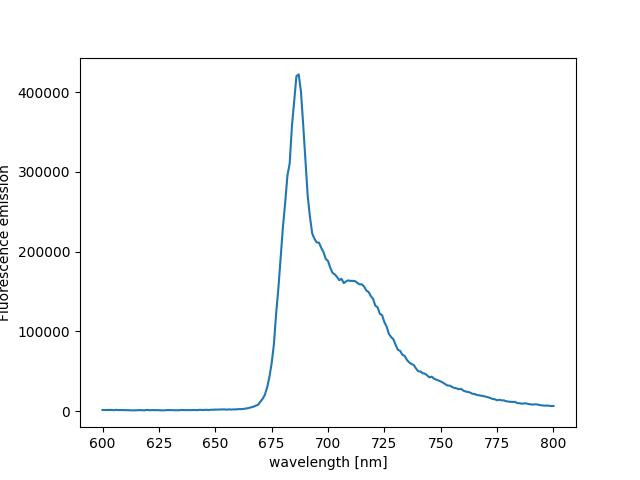

Text(0, 0.5, 'Fluorescence emission')

In [17]:
plt.plot(wt['15min']['wavelength'], wt['15min']['Dark 01'])
plt.xlabel('wavelength [nm]')
plt.ylabel('Fluorescence emission')

Could not find GLIMDA.


<IPython.core.display.Javascript object>


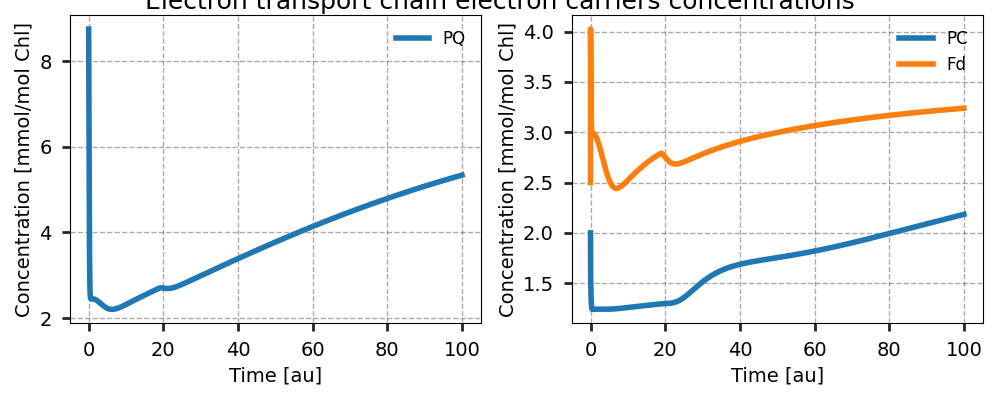

<IPython.core.display.Javascript object>


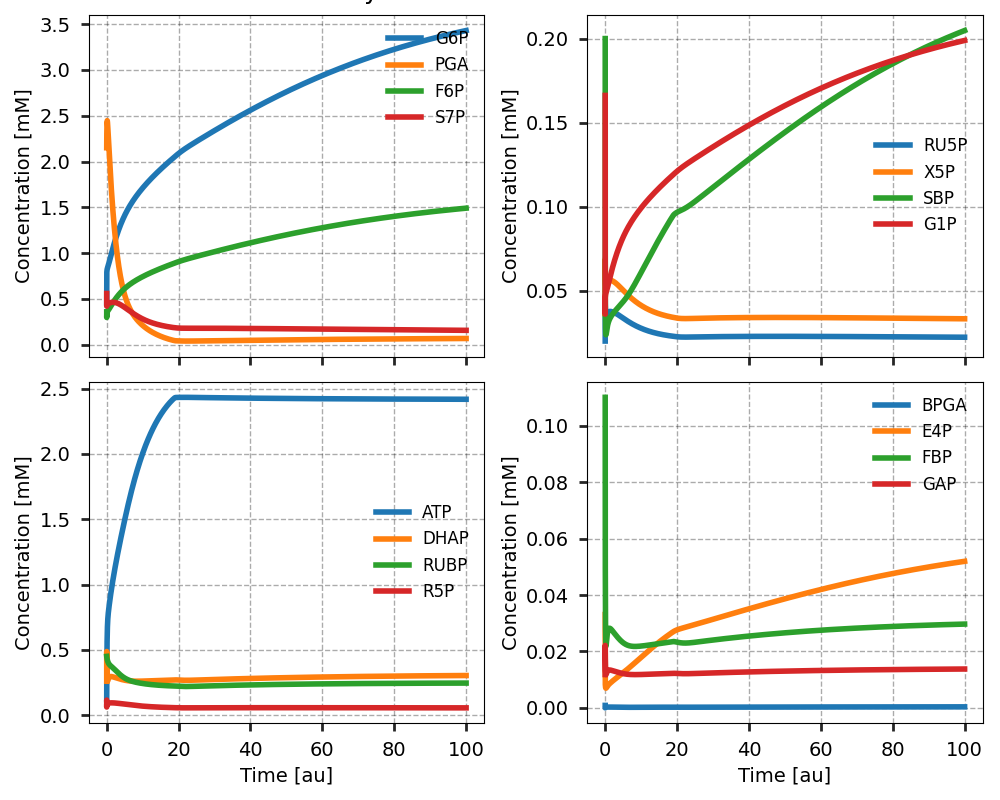

In [18]:
from modelbase.ode import Simulator

from model import model as m
from reactionrates import calculate_pHinv as phinv
from modelbase.utils.plotting import plot_grid


# Set initial conditions using dictionary
y0 = {
        "PQ":m.get_parameter('PQtot')/2,
        "PC":m.get_parameter('PCtot')/2,
        "Fd":m.get_parameter('Fdtot')/2,
        "ATP":0.12,
        "NADPH":0.281543418344,
        "H":phinv(7.2),
        "LHC":0.9,
        "Psbs":0.9,
        "Vx":0.9,
        "PGA":2.15,
        'BPGA':0.000907499521924,
        'GAP':0.011839616887,
        'DHAP':0.260471552645,
        'FBP':0.11,
        'F6P':0.36,
        'G6P':0.46,
        'G1P':0.166166918189,
        'SBP':0.2,
        'S7P':0.56,
        'E4P':0.0330766864679,
        'X5P':0.0374527459593,
        'R5P':0.0627333486958,
        'RUBP':0.45,
        'RU5P':0.02,
}

s = Simulator(m)
s.update_parameter('wv', 680)
s.initialise(y0)
t, y = s.simulate(100)

groups = [
    ["PQ"],
    ["PC","Fd"],
]

s.plot_grid(
    compound_groups=groups,
    ncols=2,
    sharex=True,
    sharey=False,
    xlabels="Time [au]",
    ylabels="Concentration [mmol/mol Chl]",
    figure_title="Electron transport chain electron carriers concentrations",
)

groups = [
    ["G6P", "PGA", "F6P", "S7P"],
    ["RU5P", "X5P", "SBP", "G1P"],
    ["ATP", "DHAP", "RUBP", "R5P"],
    ["BPGA", "E4P", "FBP", "GAP"],
]

s.plot_grid(
    compound_groups=groups,
    ncols=2,
    sharex=True,
    sharey=False,
    xlabels="Time [au]",
    ylabels="Concentration [mM]",
    figure_title="Calvin cycle substrate concentrations",
)
plt.show()

<IPython.core.display.Javascript object>


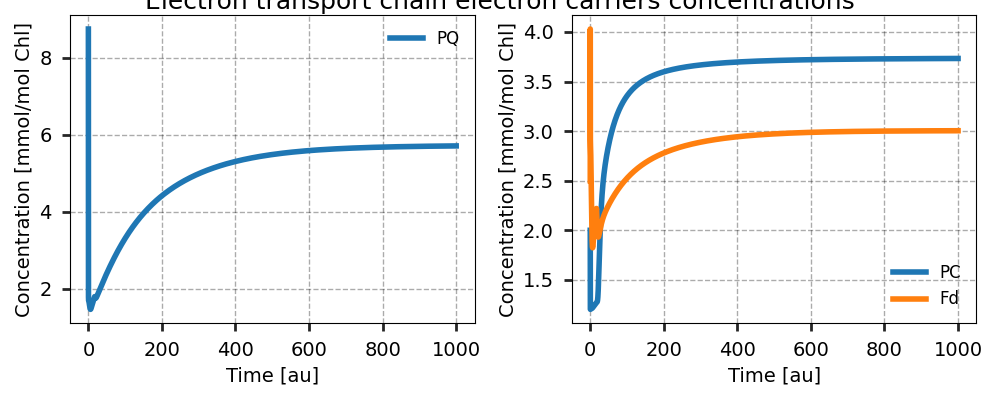

<IPython.core.display.Javascript object>


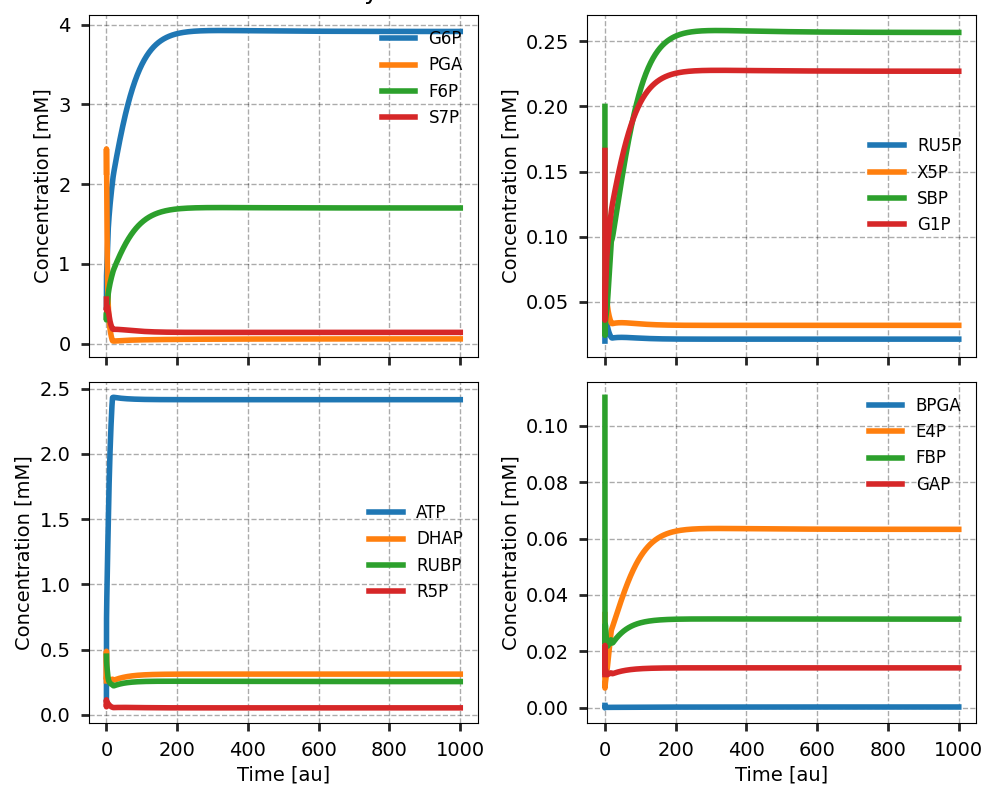

In [19]:
s = Simulator(m)
s.update_parameter('wv', 400)
s.initialise(y0)
t, y = s.simulate(1000)

groups = [
    ["PQ"],
    ["PC","Fd"],
]

s.plot_grid(
    compound_groups=groups,
    ncols=2,
    sharex=True,
    sharey=False,
    xlabels="Time [au]",
    ylabels="Concentration [mmol/mol Chl]",
    figure_title="Electron transport chain electron carriers concentrations",
)

groups = [
    ["G6P", "PGA", "F6P", "S7P"],
    ["RU5P", "X5P", "SBP", "G1P"],
    ["ATP", "DHAP", "RUBP", "R5P"],
    ["BPGA", "E4P", "FBP", "GAP"],
]

s.plot_grid(
    compound_groups=groups,
    ncols=2,
    sharex=True,
    sharey=False,
    xlabels="Time [au]",
    ylabels="Concentration [mM]",
    figure_title="Calvin cycle substrate concentrations",
)
plt.show()

In [20]:
# template for each figure
def set_figure(tt='137c wt'):
    fig = plt.figure(figsize=(9, 4))
    ax = plt.gca()
    ax.set_title(tt)
    ax.set_xlabel('wavelengths [nm]')
    ax.set_ylabel('F709/F685')
    ax.set_xticks(wv)
    ax.set_xlim(350, 730)
    return fig, ax

def plot_experiment(file = '161004 137c OLS 77K dataset.xlsx', tt='137c wt'):
    """
    file: name of the excell file with the raw 77K fluorescence data
    tt: optioinal parameter to name the graph
    ====
    return: figure with 2 plots
    """
    numbers = range(4,28)
    evens = [n for n in numbers if n % 2 == 0]

    set_figure(tt)

    excel_file = str(folder + file)
    sheets = {'15min':'blue', '4h':'red'}
    
    wt = {}
    for j in sheets.keys():
        wt[j]= pd.read_excel(excel_file, sheet_name=j)
    
    for j in sheets.keys():
        wt15= pd.read_excel(excel_file, sheet_name=j)
        ticks = []
        ratio1 = []
        ratio2 = []
        wave = []
        for i in evens:
            wave.append(int(str(wt15.columns[i])[:3]))
            ratio1.append(wt15[wt15.columns[i]][np.where(wt15['wavelength']==709)[0][0]] / wt15[wt15.columns[i]][np.where(wt15['wavelength']==685)[0][0]])
            ratio2.append(wt15[wt15.columns[i+1]][np.where(wt15['wavelength']==709)[0][0]] / wt15[wt15.columns[i+1]][np.where(wt15['wavelength']==685)[0][0]])
        plt.errorbar(wave, (np.array(ratio1)+np.array(ratio2))/2, np.sqrt((np.array(ratio1)-np.array(ratio2))**2/2), linestyle='--', marker='o', color=sheets[j], label=j )

    plt.legend()

<IPython.core.display.Javascript object>


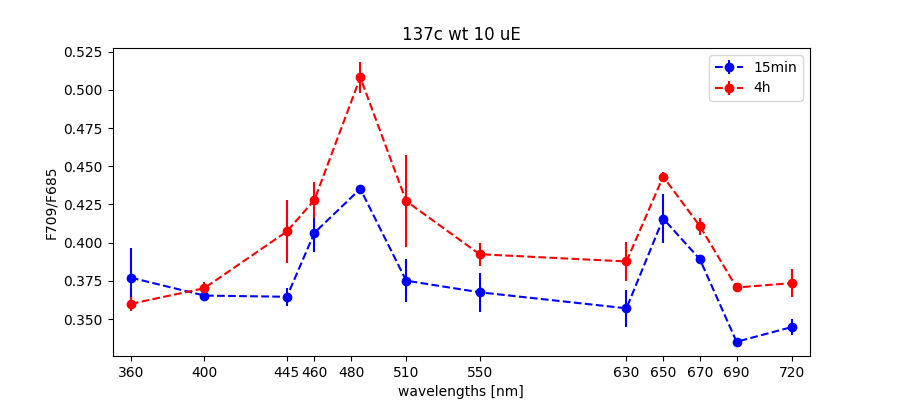

In [21]:
plot_experiment('161007 C13 OLS 77K dataset.xlsx', '137c wt 10 uE')

In [22]:
def olsscan(s, file, light=100):
    results = {}

    # plot first the experimental results
    plot_experiment(file)

    m.update_parameters({"pfd":light})

    s.initialise(y0)

    for o in organism:
        print(o)
        a = dict()
        s.update_parameters(organism[o])

        for i in wv:
            s = Simulator(m)
            s.update_parameters({"wv":i})         
            s.initialise(y0)
            Y = s.simulate(1000, steps=2500, **{'atol': 1.e-14})
            a[i] = dict(zip(y0, Y))

        ratio = []

        for j in a.keys():    
            ratio.append(m.get_full_concentration_dict(a[j])['ps1cs']/m.get_full_concentration_dict(a[j])['ps2cs'])


        results[o] = {'var': a, 'ratio':ratio}

    df=pd.DataFrame(data = results)

    ax1 = plt.gca()

    for o in organism:    

        ax1.set_title('Light: '+ str(m.get_parameter('pfd'))+' CEF:'+str(m.get_parameter('kcyc')) + 'antenna attach' + str(m.get_parameter('prob_attach')))
        ax1.plot( wv, df[o]['ratio'], color=col[o], marker = marker[o], linestyle=line[o], label = o)

    plt.legend()
    plt.show() 
    return df

In [23]:
organism = {'wt_q': {"kNh": 0.05, "kH0": 5e8}}#, 'wt': {"kNh": 0., 'kH0':0.}}#,
          #  'stt7_q': {"kNh": 0.1, "kStt7":0.0001},
          #  'stt7': {"kNh": 0., "kStt7":0.0001}, 'npq4': {"kNh": 0., "kStt7":0.0035}}

marker = {'wt_q':'s', 'wt': 's',  'stt7':'d', 'stt7_q':'d', 'npq4':'o'}
col = {'wt': 'mediumvioletred', 'wt_q': 'mediumvioletred', 'stt7_q':'orangered', 'stt7':'orangered', 'npq4':'black'}

line = {'wt': '-', 'wt_q': '--', 'stt7_q':'--', 'stt7':'-', 'npq4':'-'}

<IPython.core.display.Javascript object>


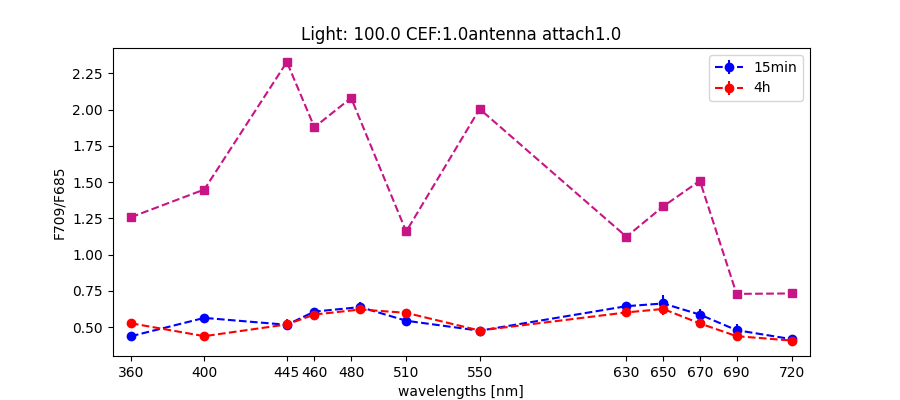

In [24]:
results = {}

# plot first the experimental results
plot_experiment('161004 137c OLS 77K dataset.xlsx', '137c wt 100 uE')

m.update_parameters({"pfd":100})

s.initialise(y0)

for o in organism:
    a = dict()
    s.update_parameters(organism[o])
    ratios = []

    for i in wv:
        s = Simulator(m)
        s.update_parameters({"wv":i})         
        s.initialise(y0)
        t, Y = s.simulate(1000, steps=2500, **{'atol': 1.e-14})
        #a[i] = dict(zip(y0, Y))
        
        ratios.append(m.get_full_concentration_dict(Y[-1])['ps1cs']/m.get_full_concentration_dict(Y[-1])['ps2cs'])
    
    ax1 = plt.gca()
    ax1.set_title('Light: '+ str(m.get_parameter('pfd'))+' CEF:'+str(m.get_parameter('kcyc')) + 'antenna attach' + str(m.get_parameter('prob_attach')))
    ax1.plot( wv, ratios, color=col[o], marker = marker[o], linestyle=line[o], label = o)
   

<IPython.core.display.Javascript object>


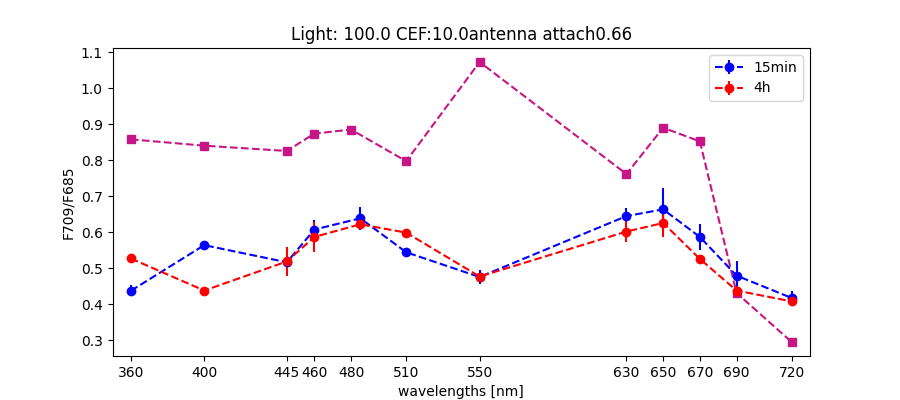

In [27]:
# Playing with the parameters
results = {}

# plot first the experimental results
plot_experiment('161004 137c OLS 77K dataset.xlsx', '137c wt 100 uE')

ratios = []
CBBspeed = 3 # I operate with the sped up CBB
for i in wv:
    s = Simulator(m)
    s.update_parameters({"pfd":100, "fcbb":3., "kcyc":10., "prob_attach":0.66, 'kPph1': 0.003, 'staticAntI': 0.2, 'staticAntII':0., "wv":i})     
    s.update_parameters({'V1' : 0.34*8*CBBspeed, 'V6' : 0.2*8*CBBspeed, 
                         'V9' : 0.04*8*CBBspeed, 'V13' : 0.9999*8*CBBspeed, 
                         'Vst' : 0.04*8*CBBspeed})
    
    s.initialise(y0)
    t, Y = s.simulate(1000, steps=5000, **{'atol': 1.e-14})
    ratios.append(m.get_full_concentration_dict(Y[-1])['ps1cs']/m.get_full_concentration_dict(Y[-1])['ps2cs'])

ax1 = plt.gca()
ax1.set_title('Light: '+ str(m.get_parameter('pfd'))+' CEF:'+str(m.get_parameter('kcyc')) + 'antenna attach' + str(m.get_parameter('prob_attach')))
ax1.plot( wv, ratios, color=col[o], marker = marker[o], linestyle=line[o], label = o)

In [42]:
# interesting to observe the impact of cbb cycle